In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')


In [63]:
df = pd.read_csv('/content/car_evaluation.csv')
df.columns = ['price', 'maint', 'doors', 'ppl', 'lug_boot', 'safety', 'acceptable']
df

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [64]:
# checking shape of dataset
df.shape

(1727, 7)

In [65]:
df.head()

,price,maint,doors,ppl,lug_boot,safety,acceptable
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [66]:
# Checking whether null values are present
df.isnull().sum()

price         0
maint         0
doors         0
ppl           0
lug_boot      0
safety        0
acceptable    0
dtype: int64

In [67]:
df.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [68]:
df.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [69]:
df.ppl.unique()

array(['2', '4', 'more'], dtype=object)

In [70]:
# Assigning X & Y variables for the model
X=df[df.columns[:-1]]
Y=df['acceptable']

In [71]:
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()

price = le.fit_transform(list(df['price']))
maint = le.fit_transform(list(df['maint']))
doors = le.fit_transform(list(df['doors']))
ppl = le.fit_transform(list(df['ppl']))
lug_boot = le.fit_transform(list(df['lug_boot']))
safety = le.fit_transform(list(df['safety']))
acceptable = le.fit_transform(list(df['acceptable']))

predict = "acceptable"

X = list(zip(price, maint, doors, ppl, lug_boot, safety, acceptable))
y = list(acceptable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 27)
model.fit(X_train, y_train)

percent_acc = model.score(X_test, y_test) * 100
print("Accuracy: %3.f" % percent_acc + "%")

predicted = model.predict(X_test)
names = ["acc", "good", "unacc", "vgood"]


Accuracy:  98%


In [73]:
# Verifying the accuracy
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00       123
           3       1.00      1.00      1.00         8

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [74]:
# Applying Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [75]:
#Choosing a K Value
#Use the elbow method to pick a good K Value:
error_rate = []

In [98]:
# Will take some time
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

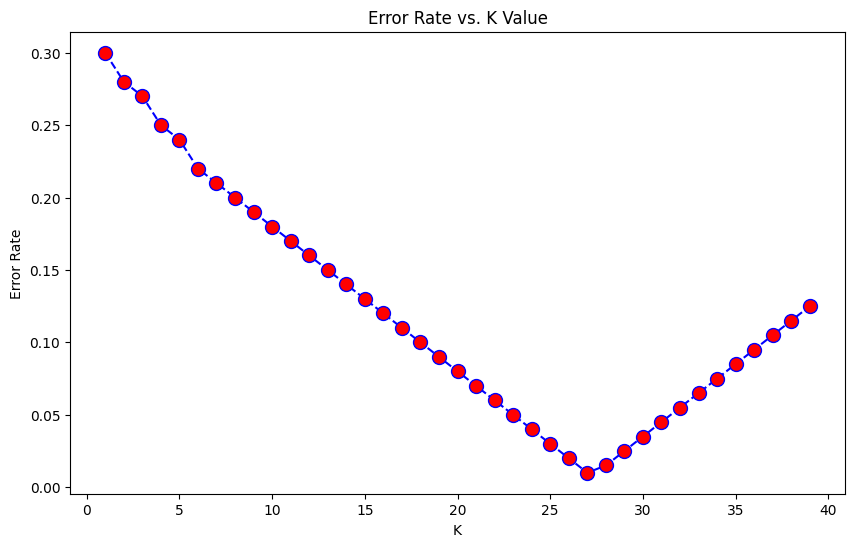

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [104]:
#Here we can see that that after rounds K>23 the error rate just tends to hover
#around 0.06-0.05 Let's retrain the model with that and check the classification report!
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 32   0   0   0]
 [  0   8   2   0]
 [  0   0 123   0]
 [  0   0   1   7]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.80      0.89        10
           2       0.98      1.00      0.99       123
           3       1.00      0.88      0.93         8

    accuracy                           0.98       173
   macro avg       0.99      0.92      0.95       173
weighted avg       0.98      0.98      0.98       173

